# Лабораторная работа #2

На сетке узлов $\overline{w_{h\tau}}$ найти численное решение смешанной задачи для одномерного уравнения
теплопроводности с использованием:  
- явной разностной схемы с $\tau = h = 0.1$ и $h = 0.1, \tau = \frac{h^2}{2}$;  
- чисто неявной разностной схемы с $\tau = h = 0.1$;  
- разностной схемы Кранка-Николсона с $\tau = h = 0.1$.

Выписать соответствующие разностные схемы, указать их порядок аппроксимации, указать,
являются ли схемы абсолютно устойчивыми по начальным данным. Найти $\max_{i, j}|y_i^j - u(x_i, t_j)|$ .
Построить графики, демонстрирующие устойчивое и неустойчивое поведение явной разностной
схемы.  
Задача:  
$\begin{cases}
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} - e^{-t}sin(x+t) & 0 < x < 1, 0 < t \leq 0.5,\\
u(x, 0) = cos(x) & 0 \leq x \leq 1,\\
u(0, t) = e^{-t}cos(t) & 0 \leq t \leq 0.5,\\
u(1, t) = e^{-t}cos(1+t) & 0 \leq t \leq 0.5.\\
\end{cases}$

Точное решение:  
$u(x, t) = e^{-t}cos(x+t)$

- Явная разностная схема

$\sigma = 0, \tau = h = 0.1 \space и\space h = 0.1, \tau = 0.005$:

$\begin{cases}
y_t = y_{\overline{x}x} - e^{-t}sin(x+t) & (x, t) \in w_{h\tau},\\
y(x, 0) = cos(x) & x \in w_h,\\
y(0, t) = e^{-t}cos(t) &  t \in w_{\tau},\\
y(1,t) = e^{-t}cos(1+t) & t \in w_{\tau}.\\
\end{cases}$

В индексной форме:

$\begin{cases}
\frac{y_i^{j + 1} - y_i^j}{\tau} = \frac{y_{i + 1}^j - 2y_i^j + y_{i - 1}^j}{h^2} + \varphi_i^j & i \in \overline{1, N_1}, j \in \overline{1, N_2 - 1},\\
y_i^0 = cos(x_i) & i \in \overline{0, N_1},\\
y_0^{j} = e^{-t_{j}}cos(t_{j}) &  j \in \overline{1, N_2},\\
y_{N_1}^{j} = e^{-t_{j}}cos(1+t_{j}) & j \in \overline{1, N_2}.\\
\end{cases}$

Порядок аппроксимации $O(\tau+h^2)$
- Чисто неявная разностная схема$\\$
$\sigma = 1, \tau = h = 0.1$:

$\begin{cases}
y_t = \widehat{y_{\overline{x}x}} - e^{-t}sin(x+t) & (x, t) \in w_{h\tau},\\
y(x, 0) = cos(x) & x \in w_h,\\
y(0, t) = e^{-t}cos(t) &  t \in w_{\tau},\\
y(1,t) = e^{-t}cos(1+t) & t \in w_{\tau}.\\
\end{cases}$

В индексной форме:

$\begin{cases}
\frac{y_i^{j + 1} - y_i^j}{\tau} = \frac{y_{i + 1}^{j+1} - 2y_i^{j+1} + y_{i - 1}^{j+1}}{h^2} + \varphi_i^j & i \in \overline{1, N_1-1}, j \in \overline{0, N_2 - 1},\\
y_i^0 = cos(x_i) & i \in \overline{0, N_1},\\
y_0^{j} = e^{-t_{j}}cos(t_{j}) & j \in \overline{1, N_2},\\
y_{N_1}^{j} = e^{-t_{j}}cos(1+t_{j}) & j \in \overline{1, N_2}.\\
\end{cases}$

Порядок аппроксимации $O(\tau+h^2)$
- Разностная схема Кранка-Николсона

$\sigma = \frac{1}{2}, \tau = h = 0.1$:

$\begin{cases}
y_t = \frac{1}{2}(y_{\overline{x}x}+\widehat{y_{\overline{x}x}}) - e^{-t-\frac{\tau}{2}}sin(x+t) & (x, t) \in w_{h\tau},\\
y(x, 0) = cos(x) & x \in w_h,\\
y(0, t) = e^{-t}cos(t) &  t \in w_{\tau},\\
y(1,t) = e^{-t}cos(1+t) & t \in w_{\tau}.\\
\end{cases}$

В индексной форме:   
$\begin{cases}
\frac{y_i^{j + 1} - y_i^j}{\tau} = \frac{1}{2}\frac{y_{i + 1}^j - 2y_i^j + y_{i - 1}^j}{h^2} + \frac{1}{2}\frac{y_{i + 1}^{j+1} - 2y_i^{j+1} + y_{i - 1}^{j+1}}{h^2} + \varphi_i^{j+\frac{1}{2}} & i \in \overline{1, N_1 - 1}, j \in \overline{0, N_2 - 1},\\
y_i^0 = cos(x_i) & i \in \overline{0, N_1},\\
y_0^{j} = e^{-t_{j}}cos(t_{j}) &  j \in \overline{1, N_2},\\
y_{N_1}^{j} = e^{-t_{j}}cos(1+t_{j}) & j \in \overline{1, N_2}.\\
\end{cases}$

Порядок аппроксимации $O(\tau^2+h^2)$

In [556]:
import numpy as np
import matplotlib.pyplot as plt
import math

def u(x, t):
    return np.exp(-t) * np.cos(t + x) 

def u0(x):
    return np.cos(x)

def mu0(t):
    return np.exp(-t)*np.cos(t)

def mu1(t):
    return np.exp(-t) * np.cos(1+t)

def f(x, t):
    return -1 * np.exp(-t) * np.sin(x + t)

def draw1(x, y, t):
    uline = [u(xl, t[0]) for xl in x]
    plt.plot(x, uline, label='точное решение', linewidth=5)
    plt.plot(x, y[0], label='приближённое решение', color='yellow')
    plt.legend(loc='best')
    plt.title("u(Xi,T[0])")
    plt.show()

def draw2(x, y, t):
    uline = [u(x[0], tl) for tl in t]
    plt.plot(t, uline, linewidth=5)
    plt.plot(t, np.transpose(y)[0], color='yellow')
    plt.title("u(X[0],Tj)")
    plt.show()

def draw3(x, y, t):
    uline = [u(xl, t[4]) for xl in x]
    plt.plot(x, uline, label='точное решение', linewidth=5)
    plt.plot(x, y[4], label='приближённое решение', color='yellow')
    plt.title("u(Xi,T[4])")
    plt.show()

def draw4(x, y, t):
    uline = [u(x[4], tl) for tl in t]
    plt.plot(t, uline, linewidth=5)
    plt.plot(t, np.transpose(y)[4], color='yellow')
    plt.title("u(X[4],Tj)")
    plt.show()

$\sigma = 0, \tau = h = 0.1$:

In [557]:
# явная_1
h = 0.1
tau = h
N1 = int(1 / h)
N2 = int(0.5 / tau)


x = [i*h for i in range(N1+1)]
u_0 = [u0(x_) for x_ in x]

t = []
phi = []
for j in range(N2 + 1):
    t.append(j * tau)
    phi.append([])
    for i in range(N1 + 1):
        phi[j].append(f(x[i], t[j]))

mu_0 = []
mu_1 = []
for t_ in t:
    mu_0.append(mu0(t_))
    mu_1.append(mu1(t_))

y = []
for j in range(N2 + 1):
    y.append([])
    for i in range(N1 + 1):
        if j == 0:
            y[j] = u_0
        elif j != 0 and 0 < i < N1:
            y[j].append(y[j - 1][i] + tau/(h ** 2) * (y[j - 1][i + 1] - 2 * y[j - 1][i] + y[j - 1][i - 1]) + tau * phi[j - 1][i])
        elif j != 0 and i == 0:
            y[j].append(mu0(t[j]))
        elif j != 0 and i == N1:
            y[j].append(mu1(t[j]))

In [558]:
# draw1(x,y,t)
#

In [559]:
# draw2(x,y,t)
#

In [560]:
# draw3(x,y,t)
#

In [561]:
# draw4(x,y,t)

In [562]:
diff = []
for j in range(N2 + 1):
    diff.append([])
    for i in range(N1 + 1):
        diff[j].append(abs(y[j][i] - u(x[i], t[j])))

max_j = [max(d) for d in diff]

print("Невязка:")
print(max(max_j))

Невязка:
1003.7104960762186


$\sigma = 0, h = 0.1, \tau = 0.005$:  

In [563]:
# явная 2
tau = h ** 2 / 2
N2 = int(0.5 / tau)

t = []
    
phi = []
for j in range(N2 + 1):
    t.append(j * tau)
    phi.append([])
    for i in range(N1 + 1):
        phi[j].append(f(x[i], t[j]))

y = []
for j in range(N2 + 1):
    y.append([])
    for i in range(N1 + 1):
        if j == 0:
            y[j] = u_0
        elif j != 0 and 0 < i < N1:
            y[j].append(y[j - 1][i] + tau/(h ** 2) * (y[j - 1][i + 1] - 2 * y[j - 1][i] + y[j - 1][i - 1]) + tau * phi[j - 1][i])
        elif j != 0 and i == 0:
            y[j].append(mu0(t[j]))
        elif j != 0 and i == N1:
            y[j].append(mu1(t[j]))

In [564]:
#draw1(x,y,t)

In [565]:
#draw2(x,y,t)

In [566]:
#draw3(x,y,t)

In [567]:
#draw4(x,y,t)

In [568]:
diff = []
for j in range(N2 + 1):
    diff.append([])
    for i in range(N1 + 1):
        diff[j].append(abs(y[j][i] - u(x[i], t[j])))

max_j = []
for d in diff:
    max_j.append(max(d))

print("Невязка:")
print(max(max_j))

Невязка:
0.00027406483420255867


$\sigma = 1, \tau = h = 0.1$: 

In [569]:
h = 0.1
tau = h
N1 = int(1 / h)
N2 = int(0.5 / tau)

t = [i * tau for i in range(N2 + 1)]
x = [i * h for i in range(N1 + 1)]

u_0 = [u0(x_) for x_ in x]
mu_0 = [mu0(t_) for t_ in t]
mu_1 = [mu1(t_) for t_ in t]

phi = []
for j in range(N2 + 1):
    phi.append([])
    for i in range(N1 + 1):
        phi[j].append(f(x[i], t[j]))

In [570]:
A = []
A = np.zeros((N1 + 1, N1 + 1))
for i in range(N1 + 1):
#     A.append([])
    for j in range(N1 + 1):
        if i == 0 and j == 0:
            A[i][j] = 1
        elif i == 0 and j != 0:
            A[i][j] = 0
        elif i == N1:
            if j == i:
                A[i][j] = 1
            else:
                A[i][j] = 0
        elif 0 < i < N1:
            if j == i:
                A[i][j] = (-1/h**2 - 1/tau)
            elif j == i - 1 or j == i + 1:
                A[i][j] = (2/(h**2))

                
y0 = [u0(x_) for x_ in x]
y0 = np.array(y0)
        
y = [y0]
# for i in range(N1 + 1):
#     if i == 0:
#         yj.append(yj0)
#     else:
#         yj.append([])

for j in range(1, N2 + 1):
    b = []
    for i in range(N1 + 1):
        if i == 0:
            b.append(mu0(t[j]))
        elif i == N1:
            b.append(mu1(t[j]))
        else:
            #b.append(-1/tau * y[j - 1][i] - 1/(2 * h ** 2) * (y[j - 1][i - 1] - 2 * y[j - 1][i] + y[j - 1][i + 1]) - f(x[i], t[j - 1] + tau/2))
            #b.append(-1/tau * y[j - 1][i] - 1 * (y[j-1][i - 1] - 2 * y[j-1][i] + y[j - 1][i + 1])/(h**2) - f(x[i], t[j - 1]))
            b.append(-1 * y[j - 1][i] / tau - f(x[i], t[j - 1]))
    y.append(np.dot(np.linalg.inv(A), b))

In [571]:
y

[array([1.        , 0.99500417, 0.98006658, 0.95533649, 0.92106099,
        0.87758256, 0.82533561, 0.76484219, 0.69670671, 0.62160997,
        0.54030231]),
 array([ 0.900317  , -1.02011082, -1.51062899,  0.14125489,  1.54202996,
         0.66275563, -1.21899636, -1.3716472 ,  0.42956938,  1.5766618 ,
         0.41043074]),
 array([ 0.80241065,  0.03034318, -0.73381754, -0.35707439,  0.53212569,
         0.57481103, -0.24656285, -0.64655622, -0.03721525,  0.60815328,
         0.29667344]),
 array([ 0.70773068, -0.76841496, -1.13066631,  0.18483351,  1.25214106,
         0.47954924, -1.01449233, -1.02225527,  0.48778641,  1.29584325,
         0.19816801]),
 array([ 0.61740565, -0.25432249, -0.71741983, -0.08194926,  0.66519755,
         0.3875871 , -0.47334495, -0.59430069,  0.20070922,  0.68360256,
         0.11393238]),
 array([ 0.53228073, -0.67658884, -0.89008163,  0.2248074 ,  1.01998232,
         0.30532729, -0.86880626, -0.75668322,  0.4853325 ,  1.01670445,
         0.04290428]

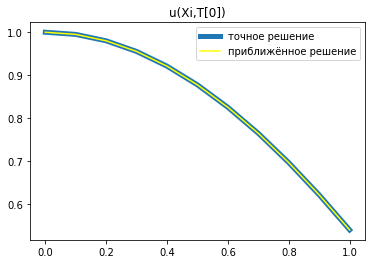

In [572]:
draw1(x,y,t)

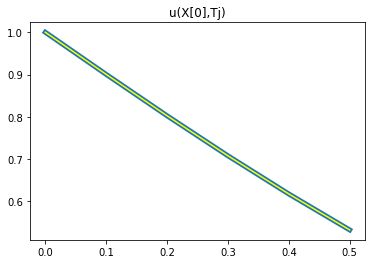

In [573]:
draw2(x,y,t)

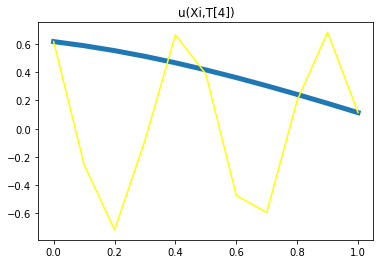

In [574]:
draw3(x,y,t)

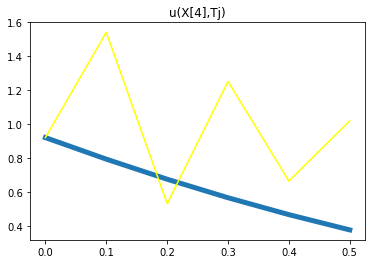

In [575]:
draw4(x,y,t)

In [576]:
diff = []
for j in range(N2 + 1):
    diff.append([])
    for i in range(N1 + 1):
        diff[j].append(abs(y[j][i] - u(x[i], t[j])))

max_j = [max(d) for d in diff]

print("Невязка:")
print(max(max_j))

Невязка:
2.375053192755564


$\sigma = \frac{1}{2}, \tau = h = 0.1$:  

In [577]:
h = 0.1
tau = h
N1 = int(1 / h)
N2 = int(0.5 / tau)

t = [i * tau for i in range(N2 + 1)]
x = [i * h for i in range(N1 + 1)]


u_0 = [u0(x_) for x_ in x]
mu_0 = [mu0(t_) for t_ in t]
mu_1 = [mu1(t_) for t_ in t]

phi = []
for j in range(N2 + 1):
    phi.append([])
    for i in range(N1 + 1):
        phi[j].append(f(x[i], t[j] + tau/2))

A = []
A = np.zeros((N1 + 1, N1 + 1))
for i in range(N1 + 1):
    for j in range(N1 + 1):
        if i == 0 and j == 0:
            A[i][j] = 1
        elif i == 0 and j != 0:
            A[i][j] = 0
        elif i == N1:
            if j == i:
                A[i][j] = 1
            else:
                A[i][j] = 0
        elif 0 < i < N1:
            if j == i:
                A[i][j] = (-1/h**2 - 1/tau)
            elif j == i - 1 or j == i + 1:
                A[i][j] = (1/(2 * h**2))

y0 = [u0(x_) for x_ in x]
y0 = np.array(y0)
y = [y0]
        
for j in range(1, N2 + 1):
    b = []
    for i in range(N1 + 1):
        if i == 0:
            b.append(mu0(t[j]))
        elif i == N1:
            b.append(mu1(t[j]))
        else:
            b.append(-1/tau * y[j - 1][i] - 1/(2 * h ** 2) * (y[j - 1][i - 1] - 2 * y[j - 1][i] + y[j - 1][i + 1]) - f(x[i], t[j - 1] + tau/2))
    y.append(np.dot(np.linalg.inv(A), b))

In [578]:
y

[array([1.        , 0.99500417, 0.98006658, 0.95533649, 0.92106099,
        0.87758256, 0.82533561, 0.76484219, 0.69670671, 0.62160997,
        0.54030231]),
 array([0.900317  , 0.88678465, 0.86439314, 0.83336621, 0.79401412,
        0.74673063, 0.69198918, 0.63033835, 0.56239669, 0.4888471 ,
        0.41043074]),
 array([0.80241065, 0.78213614, 0.75404993, 0.71843321, 0.67564261,
        0.62610672, 0.57032179, 0.50884661, 0.44229655, 0.37133668,
        0.29667344]),
 array([0.70773068, 0.68230722, 0.65007065, 0.61134378, 0.56651428,
        0.51603079, 0.46039838, 0.40017349, 0.33595862, 0.26839699,
        0.19816801]),
 array([0.61740565, 0.58822776, 0.55317739, 0.51260531, 0.46691751,
        0.4165712 , 0.36207026, 0.30396026, 0.24282285, 0.17926933,
        0.11393238]),
 array([0.53228073, 0.50055713, 0.46383748, 0.42248925, 0.37692616,
        0.32760407, 0.27501631, 0.21968869, 0.16217425, 0.10304818,
        0.04290428])]

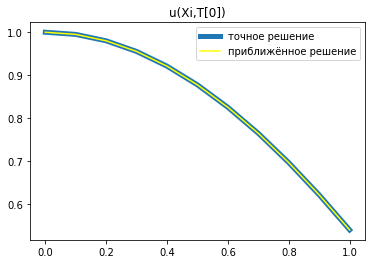

In [579]:
draw1(x,y,t)

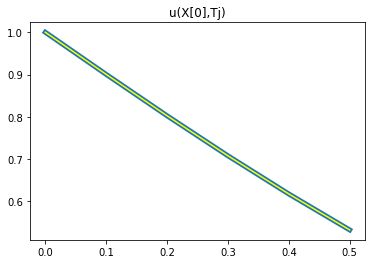

In [580]:
draw2(x,y,t)

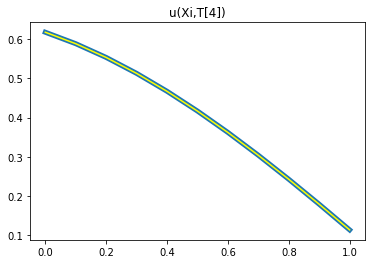

In [581]:
draw3(x,y,t)

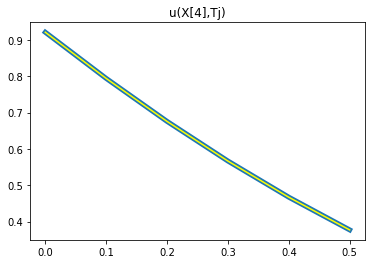

In [582]:
draw4(x,y,t)

In [583]:
diff = []
for j in range(N2 + 1):
    diff.append([])
    for i in range(N1 + 1):
        diff[j].append(abs(y[j][i] - u(x[i], t[j])))

max_j = [max(d) for d in diff]

print("Невязка:")
print(max(max_j))


Невязка:
0.00010642457937931615
